In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
with open("../data/infections_np_nodil.pickle", "rb") as f:
    final_inf_np = pickle.load(f)
with open("../data/infections_ccp_nodil.pickle", "rb") as f:
    final_inf_cp = pickle.load(f)

with open("../data/testconsumption_np_nodil.pickle", "rb") as f:
    final_tests_np = pickle.load(f)
with open("../data/testconsumption_ccp_nodil.pickle", "rb") as f:
    final_tests_cp = pickle.load(f)

In [3]:
diffs = {"infections": dict(), "tests": dict()}
sems = {"infections": dict(), "tests": dict()}

In [4]:
dilute_vals = ["average", "sum", "constant_0.8", "constant_1.0"]

diff_of_means_vals = {}
sem_of_diffs_vals = {}

first_n = 200

for metric in ["infections", "tests"]:
    if metric == "infections":
        final_np = final_inf_np
        final_cp = final_inf_cp
    else:
        final_np = final_tests_np
        final_cp = final_tests_cp

    for dilute in dilute_vals:
        diff_of_means_arr = np.zeros((7, 4))
        sem_of_diffs_arr = np.zeros((7, 4))

        for i, num_groups in enumerate(range(1,8)):
            for j, pool_size in enumerate([5,10,15,20]):

                np_inf_ = final_np[(num_groups, pool_size, dilute)][:first_n]
                cp_inf_ = final_cp[(num_groups, pool_size, dilute)][:first_n]

                diff_inf_ =  np_inf_ - cp_inf_
                sem_of_diff_inf_ = np.std(diff_inf_) / np.sqrt(len(np_inf_))

                diff_of_means_arr[i,j] = np.mean(diff_inf_)
                sem_of_diffs_arr[i,j] = sem_of_diff_inf_     
        
        diffs[metric][dilute] = diff_of_means_arr
        sems[metric][dilute] = sem_of_diffs_arr
        
        # diff_of_means_vals[dilute] = diff_of_means_arr
        # sem_of_diffs_vals[dilute] = sem_of_diffs_arr

/tmp/ipykernel_2344150/1203562735.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ha='center', va='center', color=colors[np.abs(diff_inf[i, j]) > 500], fontsize=10)
/tmp/ipykernel_2344150/1203562735.py:39: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ha='center', va='center', color=colors[np.abs(diff_tests[i, j]) > 12000], fontsize=10)


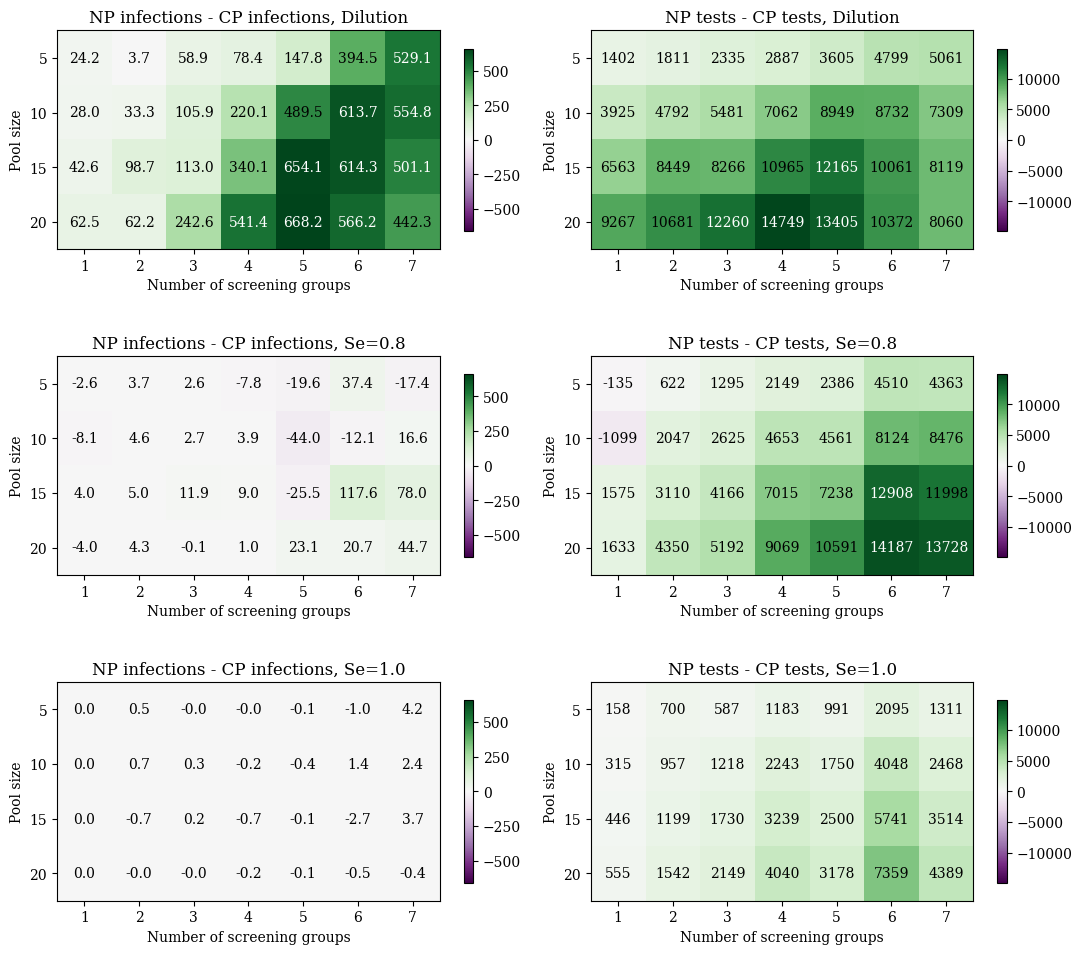

In [5]:
plt.rcParams["font.family"] = "serif"

dilute_name_mappings = {
    "average": "Dilution",
    "sum": "No dilution",
    "constant_0.5": "Se=0.5",
    "constant_0.7": "Se=0.7",
    "constant_0.8": "Se=0.8",
    "constant_1.0": "Se=1.0"
}

fig, axs = plt.subplots(3,2,figsize=(11,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)


dilute_l = ["average", "constant_0.8", "constant_1.0"]

for dilute_idx, dilute in enumerate(dilute_l):
    diff_inf = diffs["infections"][dilute]
    diff_tests = diffs["tests"][dilute]

    im_inf = axs[dilute_idx][0].imshow(diff_inf.transpose(), vmin=-660, vmax=660, cmap="PRGn")
    im_tests = axs[dilute_idx][1].imshow(diff_tests.transpose(), vmin=-14900, vmax=14900, cmap="PRGn")

    colors = ["k", "w"]

    for i, num_groups in enumerate(range(1,8)):
        for j, pool_size in enumerate([5,10,15,20]):
            # t_stat = diff[i,j] / sem_of_diffs_vals[dilute][i,j]

            axs[dilute_idx][0].text(
                i, j, 
                f"{np.round(diff_inf[i, j],1)}", 
                ha='center', va='center', color=colors[np.abs(diff_inf[i, j]) > 500], fontsize=10)
            
            axs[dilute_idx][1].text(
                i, j, 
                f"{int(np.round(diff_tests[i, j]))}", 
                ha='center', va='center', color=colors[np.abs(diff_tests[i, j]) > 12000], fontsize=10)

    axs[dilute_idx][0].set_title("NP infections - CP infections, "+dilute_name_mappings[dilute])
    axs[dilute_idx][1].set_title("NP tests - CP tests, "+dilute_name_mappings[dilute])
    
    fig.colorbar(
        im_inf, 
        shrink=0.6, 
        # orientation="horizontal"
    )
    fig.colorbar(
        im_tests, 
        shrink=0.6, 
        # orientation="horizontal"
    )
    for j in [0,1]:
        axs[dilute_idx][j].set_ylabel("Pool size")
        axs[dilute_idx][j].set_yticks(range(4), [5,10,15,20])
        axs[dilute_idx][j].set_xlabel("Number of screening groups")
        axs[dilute_idx][j].set_xticks(range(7), range(1,8))
    # plt.show()

plt.tight_layout()
fig.savefig("../figures/heatmap_infections_tests.pdf", bbox_inches='tight')

/tmp/ipykernel_2460396/4167644612.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ha='center', va='center', color=colors[np.abs(diff_inf[i, j]) > 500], fontsize=10)
/tmp/ipykernel_2460396/4167644612.py:39: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ha='center', va='center', color=colors[np.abs(diff_tests[i, j]) > 12000], fontsize=10)


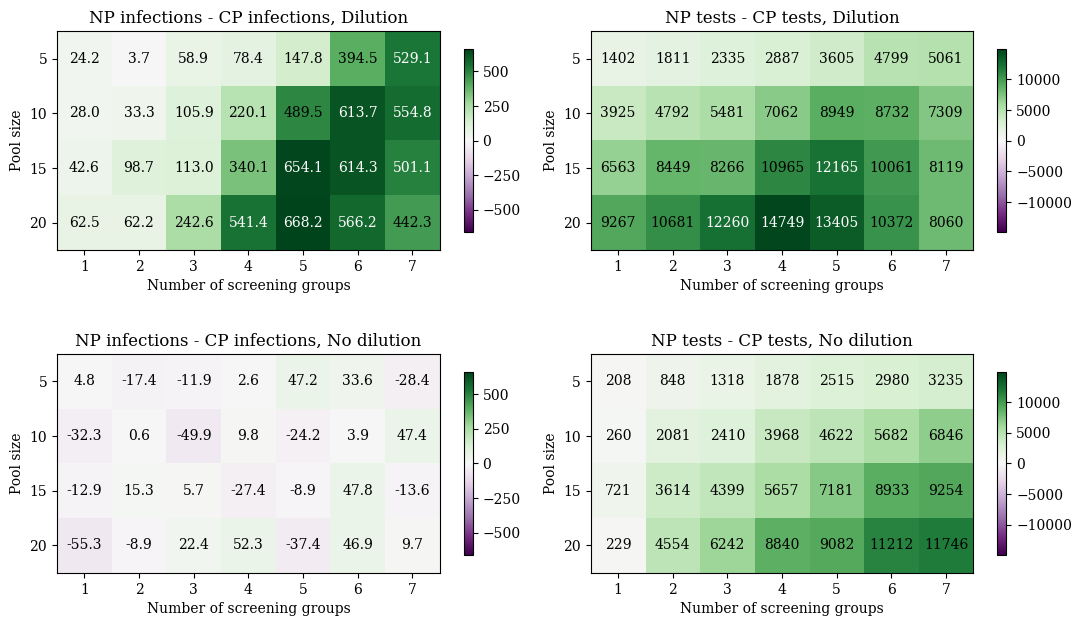

In [6]:
plt.rcParams["font.family"] = "serif"

dilute_name_mappings = {
    "average": "Dilution",
    "sum": "No dilution",
    "constant_0.5": "Se=0.5",
    "constant_0.7": "Se=0.7",
    "constant_0.8": "Se=0.8",
    "constant_1.0": "Se=1.0"
}

fig, axs = plt.subplots(2,2,figsize=(11,6.7))
fig.subplots_adjust(hspace=0.05, wspace=0.05)


dilute_l = ["average", "sum"]

for dilute_idx, dilute in enumerate(dilute_l):
    diff_inf = diffs["infections"][dilute]
    diff_tests = diffs["tests"][dilute]

    im_inf = axs[dilute_idx][0].imshow(diff_inf.transpose(), vmin=-660, vmax=660, cmap="PRGn")
    im_tests = axs[dilute_idx][1].imshow(diff_tests.transpose(), vmin=-14900, vmax=14900, cmap="PRGn")

    colors = ["k", "w"]

    for i, num_groups in enumerate(range(1,8)):
        for j, pool_size in enumerate([5,10,15,20]):
            # t_stat = diff[i,j] / sem_of_diffs_vals[dilute][i,j]

            axs[dilute_idx][0].text(
                i, j, 
                f"{np.round(diff_inf[i, j],1)}", 
                ha='center', va='center', color=colors[np.abs(diff_inf[i, j]) > 500], fontsize=10)
            
            axs[dilute_idx][1].text(
                i, j, 
                f"{int(np.round(diff_tests[i, j]))}", 
                ha='center', va='center', color=colors[np.abs(diff_tests[i, j]) > 12000], fontsize=10)

    axs[dilute_idx][0].set_title("NP infections - CP infections, "+dilute_name_mappings[dilute])
    axs[dilute_idx][1].set_title("NP tests - CP tests, "+dilute_name_mappings[dilute])
    
    fig.colorbar(
        im_inf, 
        shrink=0.6, 
        # orientation="horizontal"
    )
    fig.colorbar(
        im_tests, 
        shrink=0.6, 
        # orientation="horizontal"
    )
    for j in [0,1]:
        axs[dilute_idx][j].set_ylabel("Pool size")
        axs[dilute_idx][j].set_yticks(range(4), [5,10,15,20])
        axs[dilute_idx][j].set_xlabel("Number of screening groups")
        axs[dilute_idx][j].set_xticks(range(7), range(1,8))
    # plt.show()

plt.tight_layout()
fig.savefig("../figures/heatmap_infections_tests_dil_nodil.pdf", bbox_inches='tight')